In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("/ai/data/wuqiao/clinical_sample/WES/RAW_VCF/MT_analysis_2025.5.14_adjust_annotation/paired code and results_adjusted/data")

In [3]:
all_samples=read.table("190 samples adjacent tumor paired exon mutation_adjast_clinical.csv",sep=",",quote="\"",header=T)

In [51]:
print(head(all_samples))

       ID    Sample    class  Chr Start   End Ref    Alt             Alt_all
1 1337495 KY-131728 adjacent chrM   310   310   T      C                C,TC
2 1337495 KY-131728 adjacent chrM   310   310   T      C                C,TC
3 1338160 KY-131734 adjacent chrM 16183 16183   A ACCCCC C,ACCC,ACCCC,ACCCCC
4 1338160 KY-131734 adjacent chrM 16183 16183   A ACCCCC C,ACCC,ACCCC,ACCCCC
5 1338160 KY-131734 adjacent chrM 16183 16183   A ACCCCC C,ACCC,ACCCC,ACCCCC
6 1338160 KY-131734 adjacent chrM 16183 16183   A ACCCCC C,ACCC,ACCCC,ACCCCC
             Mutation.Class Func.MT_ensGene Gene.MT_ensGene
1 Substitution (Transition)        upstream            RNR1
2 Substitution (Transition)        upstream        tRNA-Phe
3                 Insertion        upstream        tRNA-Pro
4                 Insertion        upstream            CYTB
5                 Insertion        upstream        tRNA-Thr
6                 Insertion      downstream        tRNA-Pro
  ExonicFunc.MT_ensGene AAChange.MT_ensGe

In [4]:
# 选择所需的列
selected_data <- all_samples[, c("Sample", "class", "ExonicFunc.MT_ensGene","age")]

In [53]:
print(selected_data)

            Sample    class   ExonicFunc.MT_ensGene age
1        KY-131728 adjacent                          40
2        KY-131728 adjacent                          40
3        KY-131734 adjacent                          39
4        KY-131734 adjacent                          39
5        KY-131734 adjacent                          39
6        KY-131734 adjacent                          39
7        KY-131734 adjacent                          39
8        KY-131734 adjacent                          39
9       WES-K84460 adjacent          synonymous SNV  45
10      WES-K84460 adjacent                          45
11      WES-K84460 adjacent       nonsynonymous SNV  45
12      WES-K84460 adjacent                          45
13      WES-K84460 adjacent                          45
14      WES-K84460 adjacent                          45
15      WES-K84464 adjacent                          47
16      WES-K84464 adjacent                          47
17      WES-K84464 adjacent                     

In [5]:
result <- selected_data %>%
  group_by(Sample,class,age) %>%
  summarise(
    nonsynonymous_count = sum(ExonicFunc.MT_ensGene == "nonsynonymous SNV", na.rm = TRUE),
    synonymous_count = sum(ExonicFunc.MT_ensGene == "synonymous SNV", na.rm = TRUE),
    ratio = nonsynonymous_count / synonymous_count
  )

`summarise()` has grouped output by 'Sample', 'class'. You can override using
the `.groups` argument.


In [6]:
print(result)

# A tibble: 190 × 6
# Groups:   Sample, class [190]
   Sample    class      age nonsynonymous_count synonymous_count ratio
   <chr>     <chr>    <int>               <int>            <int> <dbl>
 1 KY-131728 adjacent    40                   0                0 NaN  
 2 KY-131729 tumor       40                   1                1   1  
 3 KY-131732 adjacent    29                   0                0 NaN  
 4 KY-131733 tumor       29                   0                0 NaN  
 5 KY-131734 adjacent    39                   0                0 NaN  
 6 KY-131735 tumor       39                   1                0 Inf  
 7 KY-131738 adjacent    26                   0                0 NaN  
 8 KY-131739 tumor       26                   1                0 Inf  
 9 KY-131742 adjacent    26                   0                0 NaN  
10 KY-131743 tumor       26                   1                2   0.5
# ℹ 180 more rows


In [56]:
dim(result)

[1] 190   6

In [57]:
write.table(result,"190_samples_exonMutation_tumor_adjacent_dN vs ds.csv",sep=",",quote=F,row.names=F)

In [7]:
# 先去掉 ratio 是 NaN 或 Inf 的行
df_clean <- result %>%
  filter(!is.nan(ratio), !is.infinite(ratio))

# 查看清理后情况
summary(df_clean$ratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.5000  0.7593  1.0000  6.0000 

In [8]:
df_clean

Sample,class,age,nonsynonymous_count,synonymous_count,ratio
<chr>,<chr>,<int>,<int>,<int>,<dbl>
KY-131729,tumor,40,1,1,1.0
KY-131743,tumor,26,1,2,0.5
KY-131747,tumor,38,1,2,0.5
KY-131757,tumor,53,0,2,0.0
KY-131763,tumor,45,0,2,0.0
KY-131768,adjacent,56,5,2,2.5
KY-131769,tumor,56,0,1,0.0
KY-131771,tumor,33,1,2,0.5
KY-131773,tumor,24,1,1,1.0


In [9]:
tumor_ratio <- df_clean$ratio[df_clean$class == "tumor"]
adjacent_ratio <- df_clean$ratio[df_clean$class == "adjacent"]

In [10]:
wilcox_res <- wilcox.test(tumor_ratio, adjacent_ratio)
wilcox_res$p.value

[1] 0.2068741

In [19]:
wilcox_res <- ks.test(tumor_ratio, adjacent_ratio)
wilcox_res$p.value

[1] 0.1335557

In [12]:
library(coin)

In [14]:
df_clean$class <- factor(df_clean$class)

library(coin)
perm_res <- oneway_test(ratio ~ class, data = df_clean,
                        distribution = approximate(B = 10000))
pvalue(perm_res)


Warning message in approximate(B = 10000):
“‘B’ is deprecated; use ‘nresample’ instead”


[1] 0.4837
99 percent confidence interval:
 0.4707880 0.4966276

In [16]:
set.seed(123)

# 分组数据
tumor_vals <- df_clean$ratio[df_clean$class == "tumor"]
adjacent_vals <- df_clean$ratio[df_clean$class == "adjacent"]

# 观察到的均值差
obs_diff <- mean(tumor_vals) - mean(adjacent_vals)

# Bootstrap 重采样
n_boot <- 10000
boot_diffs <- replicate(n_boot, {
  mean(sample(tumor_vals, replace = TRUE)) -
    mean(sample(adjacent_vals, replace = TRUE))
})

# 双尾P值：看有多少bootstrap结果比obs更极端
p_val <- mean(abs(boot_diffs) >= abs(obs_diff))

obs_diff
p_val


[1] -0.1959616

[1] 0.5462

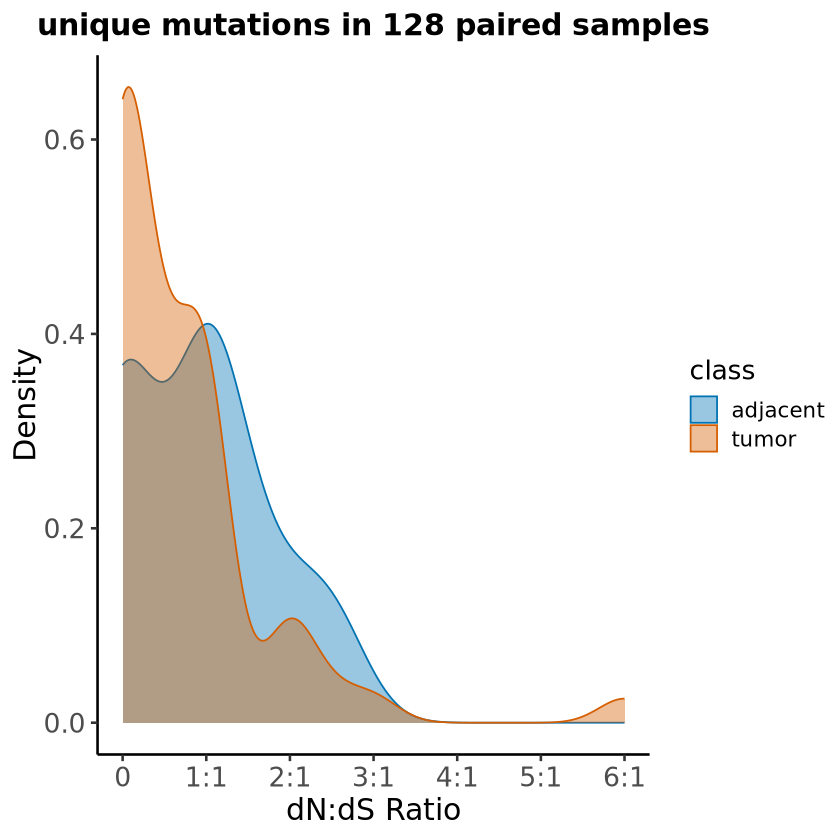

In [64]:
# 画密度分布图
p=ggplot(df_clean, aes(x = ratio, fill = class, color = class)) +
  geom_density(alpha = 0.4) +
  scale_color_manual(values = c("adjacent" = "#0072B2", "tumor" = "#D55E00")) +
  scale_fill_manual(values = c("adjacent" = "#0072B2", "tumor" = "#D55E00")) +
  scale_x_continuous(
    breaks = 0:6,  # 横轴刻度
    labels = c("0", "1:1", "2:1", "3:1", "4:1", "5:1", "6:1")
  ) +
  labs(
    title = "unique mutations in 128 paired samples",
    x = "dN:dS Ratio",
    y = "Density"
  ) +
  theme_classic(base_size = 16) +   # 去掉背景，保留轴线，整体字号调大
  theme(
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 16),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)
  )
  print(p)

In [65]:
ggsave("/ai/data/wuqiao/clinical_sample/WES/RAW_VCF/MT_analysis_2025.5.14_adjust_annotation/paired code and results_adjusted/plots/dN dS ratio in 256 adjacent and tumor samples.pdf", plot = p, width = 8, height = 8,dpi=300)

In [78]:
#### 共同的突变
repeat_samples=read.table("Repeated mutations in tumor and adjacent.csv",sep=",",quote="\"",header=T)
only_common=read.table("only common 19 samples.csv",sep=",",quote="\"",header=T)

In [79]:
filtered <- repeat_samples[repeat_samples$ID %in% only_common$ID, ]

In [81]:
write.table(filtered,"only common mutations in 19 paired tumor adjacent samples.csv",sep=",",quote=T,row.names=F)

In [69]:
# 选择所需的列
common_data <- filtered[, c("ID","Sample", "class", "ExonicFunc.MT_ensGene")]

In [70]:
length(unique(common_data$ID))

[1] 19

In [71]:
result_common <- common_data %>%
  group_by(Sample,class) %>%
  summarise(
    nonsynonymous_count = sum(ExonicFunc.MT_ensGene == "nonsynonymous SNV", na.rm = TRUE),
    synonymous_count = sum(ExonicFunc.MT_ensGene == "synonymous SNV", na.rm = TRUE),
    ratio = nonsynonymous_count / synonymous_count
  )

`summarise()` has grouped output by 'Sample'. You can override using the
`.groups` argument.


In [39]:
head(result_common)

Sample,class,nonsynonymous_count,synonymous_count,ratio
<chr>,<chr>,<int>,<int>,<dbl>
KY-131730,adjacent,13,12,1.083333
KY-131731,tumor,13,12,1.083333
KY-131745,tumor,15,6,2.500000
KY-131752,adjacent,14,10,1.400000
KY-131753,tumor,14,10,1.400000
KY-131797,tumor,16,10,1.600000


In [72]:
write.table(result_common,"only 19 common_samples_exonMutation_tumor_adjacent_dN vs ds.csv",sep=",",quote=F,row.names=F)

In [73]:
# 先去掉 ratio 是 NaN 或 Inf 的行
df_clean_common <- result_common %>%
  filter(!is.nan(ratio), !is.infinite(ratio))

# 查看清理后情况
summary(df_clean_common$ratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5556  1.0833  1.4000  1.5321  2.0357  2.7500 

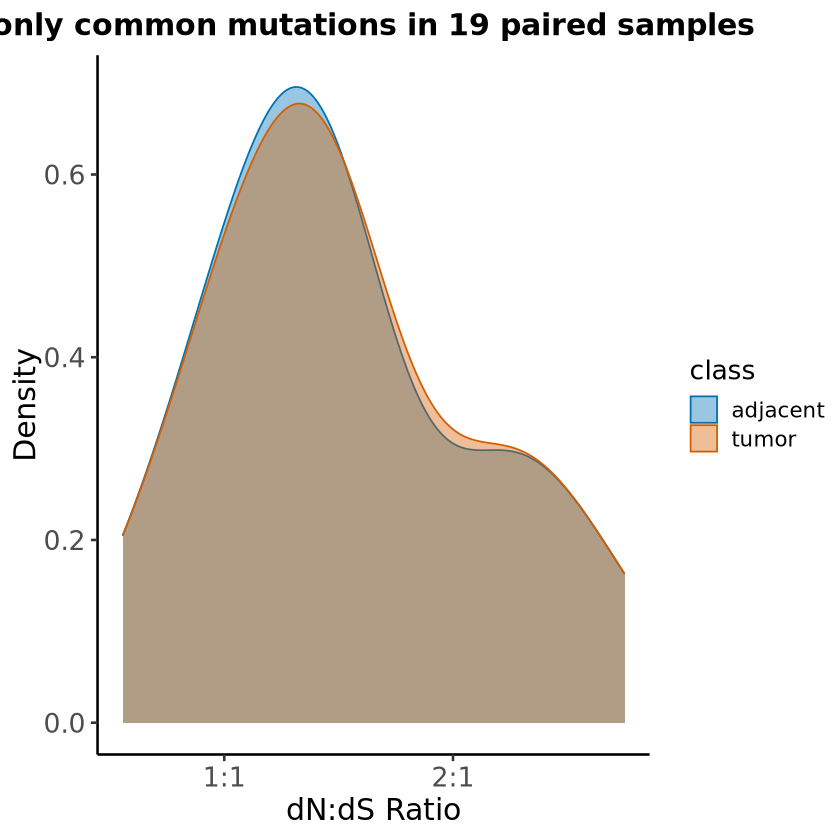

In [74]:
# 画密度分布图
p=ggplot(df_clean_common, aes(x = ratio, fill = class, color = class)) +
  geom_density(alpha = 0.4) +
  scale_color_manual(values = c("adjacent" = "#0072B2", "tumor" = "#D55E00")) +
  scale_fill_manual(values = c("adjacent" = "#0072B2", "tumor" = "#D55E00")) +
  scale_x_continuous(
    breaks = 0:3,  # 横轴刻度
    labels = c("0", "1:1", "2:1", "3:1")
  ) +
  labs(
    title = "only common mutations in 19 paired samples",
    x = "dN:dS Ratio",
    y = "Density"
  ) +
  theme_classic(base_size = 16) +   # 去掉背景，保留轴线，整体字号调大
  theme(
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 16),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)
  )
  print(p)

In [75]:
ggsave("/ai/data/wuqiao/clinical_sample/WES/RAW_VCF/MT_analysis_2025.5.14_adjust_annotation/paired code and results_adjusted/plots/dN dS ratio in only 19 common adjacent and tumor samples.pdf", plot = p, width = 8, height = 8,dpi=300)